In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer as YJ
from sklearn.preprocessing import PolynomialFeatures
 

In [6]:
# data = pd.read_csv('./data/parkinsons_updrs.data.csv')
data_new = pd.read_csv('./data/parkinsons.csv')

In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
data.describe()

NameError: name 'data' is not defined

In [ ]:
data_new.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# data=data.loc[:,["index","subject#","age","sex","test_time","motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"]]


In [ ]:
# data.hist(column=['motor_UPDRS','total_UPDRS','Jitter(%)','Shimmer','NHR','HNR','RPDE','DFA','PPE'], figsize=(20,20))


In [ ]:
data_new.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data_new.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# time_delta = data.groupby(['subject#'])['test_time'].diff()
# # time_delta.agg['mean','median','std', 'min']
# time_delta.fillna(time_delta.mean(), inplace=True)

In [ ]:
# time_delta.agg(['mean','median','std', 'min'])

In [ ]:
# x = data.assign(time_delta=time_delta)
# x[['index','test_time','time_delta']].query('time_delta < 0')

In [ ]:
# data[['subject#','test_time']]

In [ ]:
# data['subject#'].value_counts()

In [ ]:
# data['subject#'].unique()

In [ ]:
# data = data.groupby(['subject#','test_time']).mean().drop('index', axis=1).reset_index()
# data[data['subject#'] == 1]

In [ ]:
# mms = MinMaxScaler()
# test_time_normal = data.groupby('subject#')['test_time'].apply(
#     lambda q:mms.fit_transform(q.to_numpy().reshape(-1,1)))
# test_time_normal = test_time_normal.explode().apply(lambda q: q[0])
# data['test_time_normal'] = test_time_normal.tolist()
# data = data.set_index(['subject#', 'test_time_normal'])

# data.loc[1]

In [ ]:
# sex=data.reset_index()[['subject#', 'sex']].drop_duplicates()
# pe = data.drop(['sex', 'test_time'], axis=1)
# pe['motor_UPDRS'] = pe.groupby('subject#')['motor_UPDRS'].diff()
# pe['total_UPDRS'] = pe.groupby(['subject#'])['total_UPDRS'].diff()
# pe

In [ ]:
# yj = YJ()
# pe_ = pd.DataFrame(yj.fit_transform(pe), index = pe.index, columns=pe.columns)
# pe_

In [ ]:
# pe_.hist(column=["motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"], figsize=(20,20))


In [ ]:
# pe.aggregate(['mean','median','std']).T.join(pe_.agg(['mean','median','std']).T, rsuffix='_YJ')

In [ ]:
# pe_.loc[:3].groupby('subject#')[['Shimmer', 'Jitter(%)','total_UPDRS']].plot(figsize=(16,16))


In [ ]:
data_new.head(4)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


In [ ]:
data_new.shape

(195, 24)

In [ ]:
data_new[data_new.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [ ]:
# plt.figure(figsize=(25,10))
# for i, col in enumerate(data_new.drop(['name', 'status'], axis=1)):
#     plt.subplot(3, 8, i+1)
#     sns.kdeplot(data_new[col], fill=True, color='red', alpha=.5, hue=data_new['status'])
    

# plt.show()

    

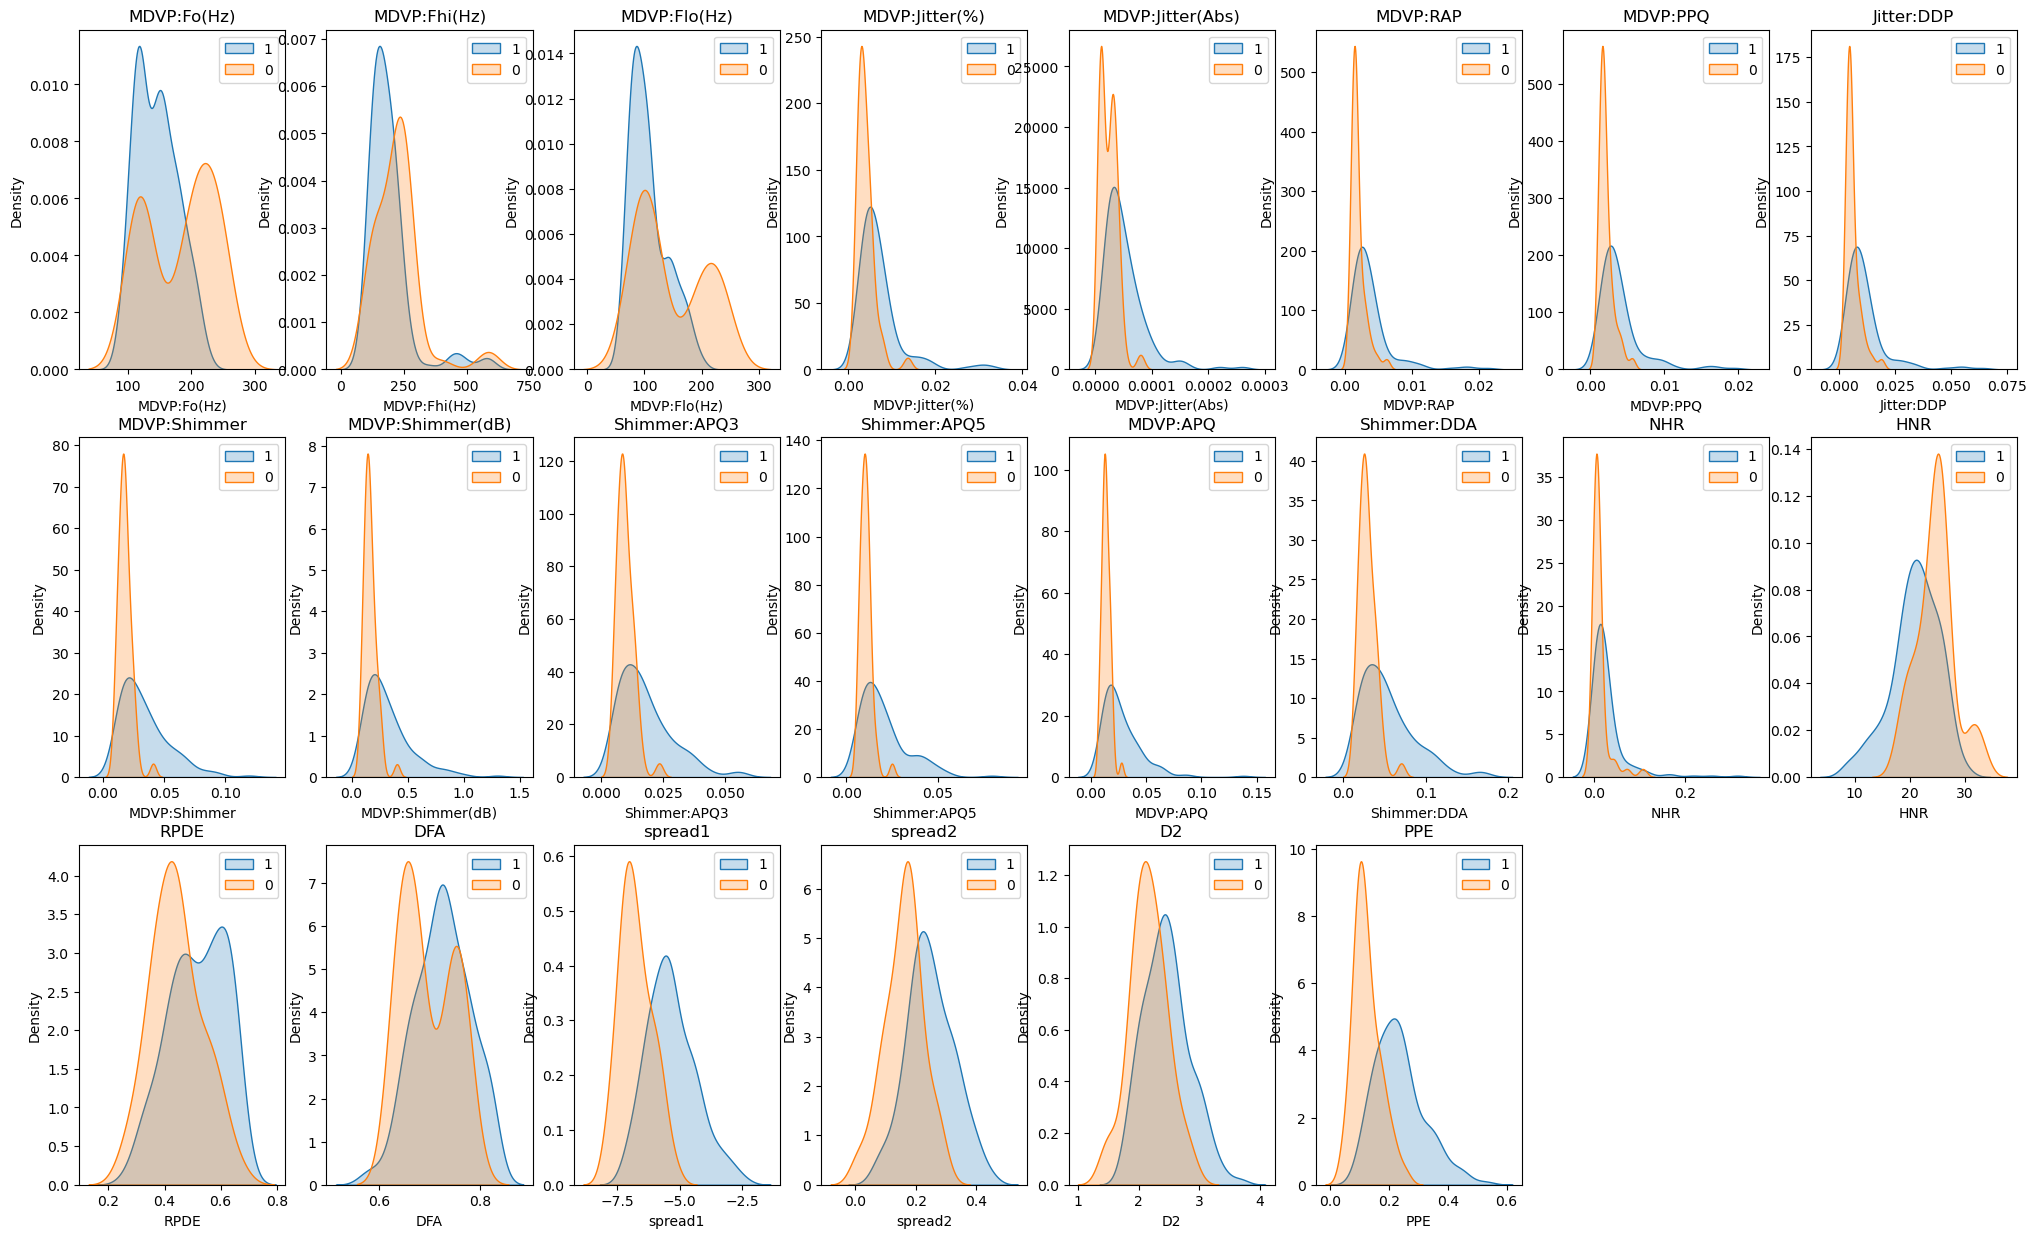

In [ ]:
plt.figure(figsize=(25, 15))
for i, col in enumerate(data_new.drop(['name', 'status'], axis=1)):
    plt.subplot(3, 8, i + 1)
    for status_value in data_new['status'].unique():
        sns.kdeplot(data_new[col][data_new['status'] == status_value], fill=True, label=status_value)
    plt.title(col)
    plt.legend()

plt.show()

In [ ]:
# sns.pairplot(data_new, hue='status')

C:\Users\alokk\AppData\Local\Temp\ipykernel_12904\2017448917.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

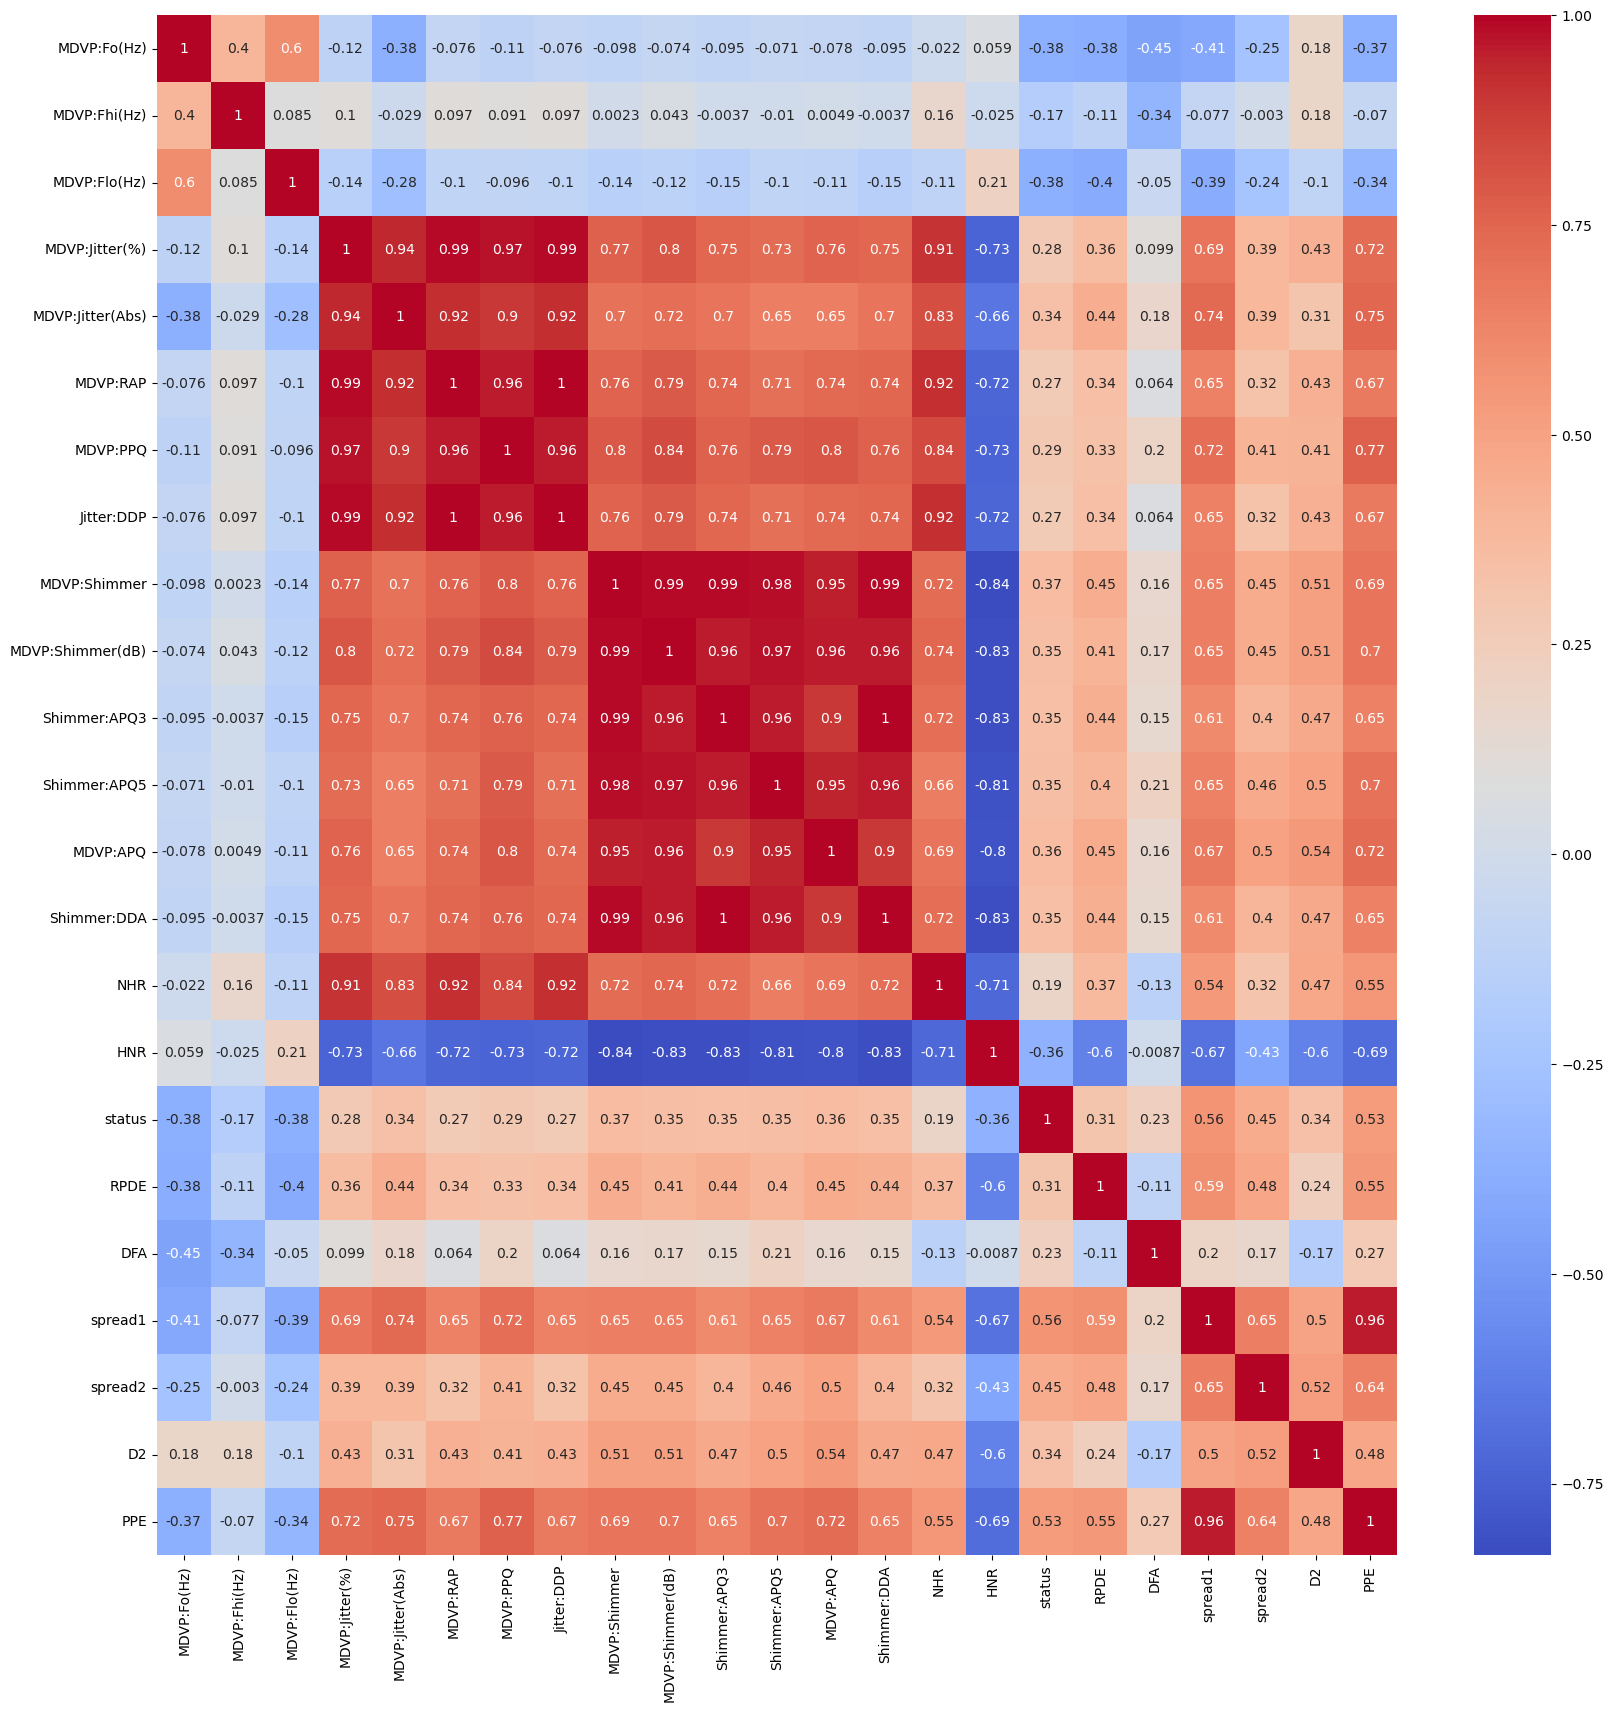

In [ ]:
# print(data_new.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')

In [ ]:
data_new.groupby('status').mean()

C:\Users\alokk\AppData\Local\Temp\ipykernel_12904\4000151334.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
# count plot using plotly
fig = px.histogram(data_new, x='status', color='status')
fig.show()

In [ ]:
data_new['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [18]:
# x = data_new.drop(['name', 'status'])
# y = data_new['status']
x=data_new.drop(['name', 'status'], axis=1)
y=data_new['status']

In [16]:
from sklearn.model_selection import train_test_split


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=200, stratify=y)
# x=xtest

def myModel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train_score = model.score(xtrain, ytrain)
    test_score = model.score(xtest, ytest)
    
    cm = confusion_matrix(ytest, ypred)
    cr = classification_report(ytest, ypred)
    ac = accuracy_score(ytest, ypred)
    roc_auc = roc_auc_score(ytest, ypred)
    fpr, tpr, threshold = roc_curve(ytest, ypred)
    plt.plot(fpr, tpr, label=model)
    
    print(f'Model:{model}\nTraining Score: {train_score}\nTesting Score: {test_score}\nConfusion Matrix: \n{cm}\
    \nClassification_report\n{cr}\nAccuracy Score: {ac}\nROC_AUC_Score: {roc_auc}\nFalsePositiveRate: {fpr}')
    print()
    return model

In [27]:
print(" x train shape >> ", xtrain.shape)
print(" x test shape >> ",xtest.shape)
print(" y train shape >> ",ytrain.shape)
print(" y test shape >> ",ytest.shape)
xtrain

 x train shape >>  (156, 22)
 x test shape >>  (39, 22)
 y train shape >>  (156,)
 y test shape >>  (39,)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
36,177.876,192.921,168.013,0.00411,0.000020,0.00233,0.00241,0.00700,0.02126,0.189,...,0.01612,0.03463,0.00586,23.216,0.360148,0.778834,-6.149653,0.218037,2.477082,0.165827
175,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
58,116.879,131.897,108.153,0.00788,0.000070,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
30,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,150.440,163.441,144.736,0.00396,0.000030,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
65,228.969,239.541,113.201,0.00238,0.000010,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
10,88.333,112.240,84.072,0.00505,0.000060,0.00254,0.00330,0.00763,0.02143,0.197,...,0.01892,0.03237,0.01166,21.118,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
156,122.336,142.369,94.794,0.00727,0.000060,0.00415,0.00339,0.01246,0.02293,0.223,...,0.01771,0.03615,0.03191,22.953,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xtrain)
xtrain = ss.transform(xtrain)
xtest = ss.transform(xtest)


In [29]:
print(" x train shape >> ", xtrain.shape)
print(" x test shape >> ",xtest.shape)
xtrain

 x train shape >>  (156, 22)
 x test shape >>  (39, 22)


array([[ 1.1507971 ,  0.10922814,  1.84656787, ..., -0.55802974,
        -2.25229138, -1.71354581],
       [ 0.56919139, -0.08305718,  1.17740519, ..., -0.10900998,
         0.20312151, -0.50276687],
       [-0.92109277, -0.80156185, -0.18962882, ..., -0.3375045 ,
        -1.11935082, -0.30142296],
       ...,
       [-1.5660575 , -0.91342554, -0.75509961, ...,  1.85733439,
         0.01940391,  0.42351445],
       [-0.75521949, -0.60333805, -0.50825579, ...,  0.03303884,
         0.78918037,  0.10125382],
       [ 0.03222552,  0.27162551, -0.8475797 , ...,  0.59301469,
        -0.41658208, -1.13542166]])

In [ ]:
# DECISION TREE CLASSIFIER MODEL

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

Model:DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=20)
Training Score: 0.8974358974358975
Testing Score: 0.8461538461538461
Confusion Matrix: 
[[ 8  2]
 [ 4 25]]    
Classification_report
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39

Accuracy Score: 0.8461538461538461
ROC_AUC_Score: 0.8310344827586207
FalsePositiveRate: [0.  0.2 1. ]



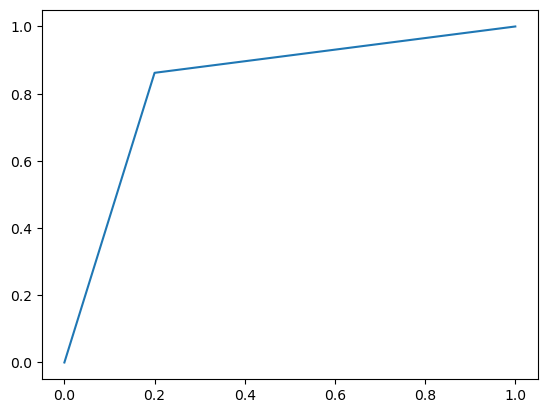

In [32]:
from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier()
dtc = myModel(DecisionTreeClassifier(max_depth=30, criterion='entropy', min_samples_split=2, min_samples_leaf=20))


In [34]:
data_new.sample(1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
97,phon_R01_S24_1,125.036,143.946,116.187,0.0128,0.0001,0.00743,0.00623,0.02228,0.03886,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623


In [35]:
# FUNCTION TO PREDICT THE STATUS OF PARKINSONS DISEASE

def predictStatus(model, input_data=()):
    input_data_np = np.asarray(input_data)
    input_data_re = input_data_np.reshape(1, -1)
    s_data = ss.transform(input_data_re)
    pred = model.predict(s_data)
    print(pred)
    if(pred[0] == 0):
        print("The Person is Healthy")
    else:
        print("The Person is not Healthy")

In [54]:
# call the function to predict the status of parkinsons disease
# take some random data from the dataset

input_data = data_new.sample(1)
input_data = input_data.drop(['name', 'status'], axis=1)

predictStatus(dtc, input_data=input_data)



[0]
The Person is Healthy


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
#  For the data table provided below, calculate the entropy associated with each attribute / feature 
# at the root node. Using this information, identify the first feature that you’d select for constructing 
# the decision tree. Use Information Gain as the impurity measure to identify the root node. 
# status is the class label.







In [63]:
import numpy as np
from scipy.stats import entropy

# Load your dataset

# Define a function to calculate entropy
def calcEntropy(labels):
    value, counts = np.unique(labels, return_counts=True)
    prob = counts / len(labels)
    return -np.sum(prob * np.log2(prob))

# Calculate the entropy for each feature
entropy_info = []
for col in data_new.columns:
    if col not in ['name', 'status']:
        entropy_value = calcEntropy(data_new[col])
        entropy_info.append([col, entropy_value])

# Calculate the entropy for the target variable (status)
target_entropy = calcEntropy(data_new['status'])

# Calculate Information Gain for each feature
information_gain = []
for col, entropy_value in entropy_info:
    information_gain.append([col, target_entropy - entropy_value])

# Create a DataFrame to display the results
entropy_df = pd.DataFrame(entropy_info, columns=['Feature', 'Entropy'])
information_gain_df = pd.DataFrame(information_gain, columns=['Feature', 'Information_Gain'])

# Sort by Information Gain in descending order
information_gain_df = information_gain_df.sort_values(by='Information_Gain', ascending=False)

# Print the sorted Information Gain
print(information_gain_df)



             Feature  Information_Gain
4   MDVP:Jitter(Abs)         -2.557464
9   MDVP:Shimmer(dB)         -6.278416
5           MDVP:RAP         -6.354082
6           MDVP:PPQ         -6.472643
3     MDVP:Jitter(%)         -6.564951
7         Jitter:DDP         -6.644488
10      Shimmer:APQ3         -6.689385
14               NHR         -6.699641
8       MDVP:Shimmer         -6.730410
11      Shimmer:APQ5         -6.740667
12          MDVP:APQ         -6.740667
13       Shimmer:DDA         -6.740667
19           spread2         -6.791949
17               DFA         -6.802205
20                D2         -6.802205
18           spread1         -6.802205
0        MDVP:Fo(Hz)         -6.802205
16              RPDE         -6.802205
15               HNR         -6.802205
1       MDVP:Fhi(Hz)         -6.802205
2       MDVP:Flo(Hz)         -6.802205
21               PPE         -6.802205


In [62]:
#  Print the entropy of each feature
print(entropy_df)

             Feature   Entropy
0        MDVP:Fo(Hz)  7.607330
1       MDVP:Fhi(Hz)  7.607330
2       MDVP:Flo(Hz)  7.607330
3     MDVP:Jitter(%)  7.370076
4   MDVP:Jitter(Abs)  3.362589
5           MDVP:RAP  7.159207
6           MDVP:PPQ  7.277768
7         Jitter:DDP  7.449613
8       MDVP:Shimmer  7.535535
9   MDVP:Shimmer(dB)  7.083541
10      Shimmer:APQ3  7.494510
11      Shimmer:APQ5  7.545792
12          MDVP:APQ  7.545792
13       Shimmer:DDA  7.545792
14               NHR  7.504766
15               HNR  7.607330
16              RPDE  7.607330
17               DFA  7.607330
18           spread1  7.607330
19           spread2  7.597074
20                D2  7.607330
21               PPE  7.607330


In [65]:
from sklearn.tree import plot_tree

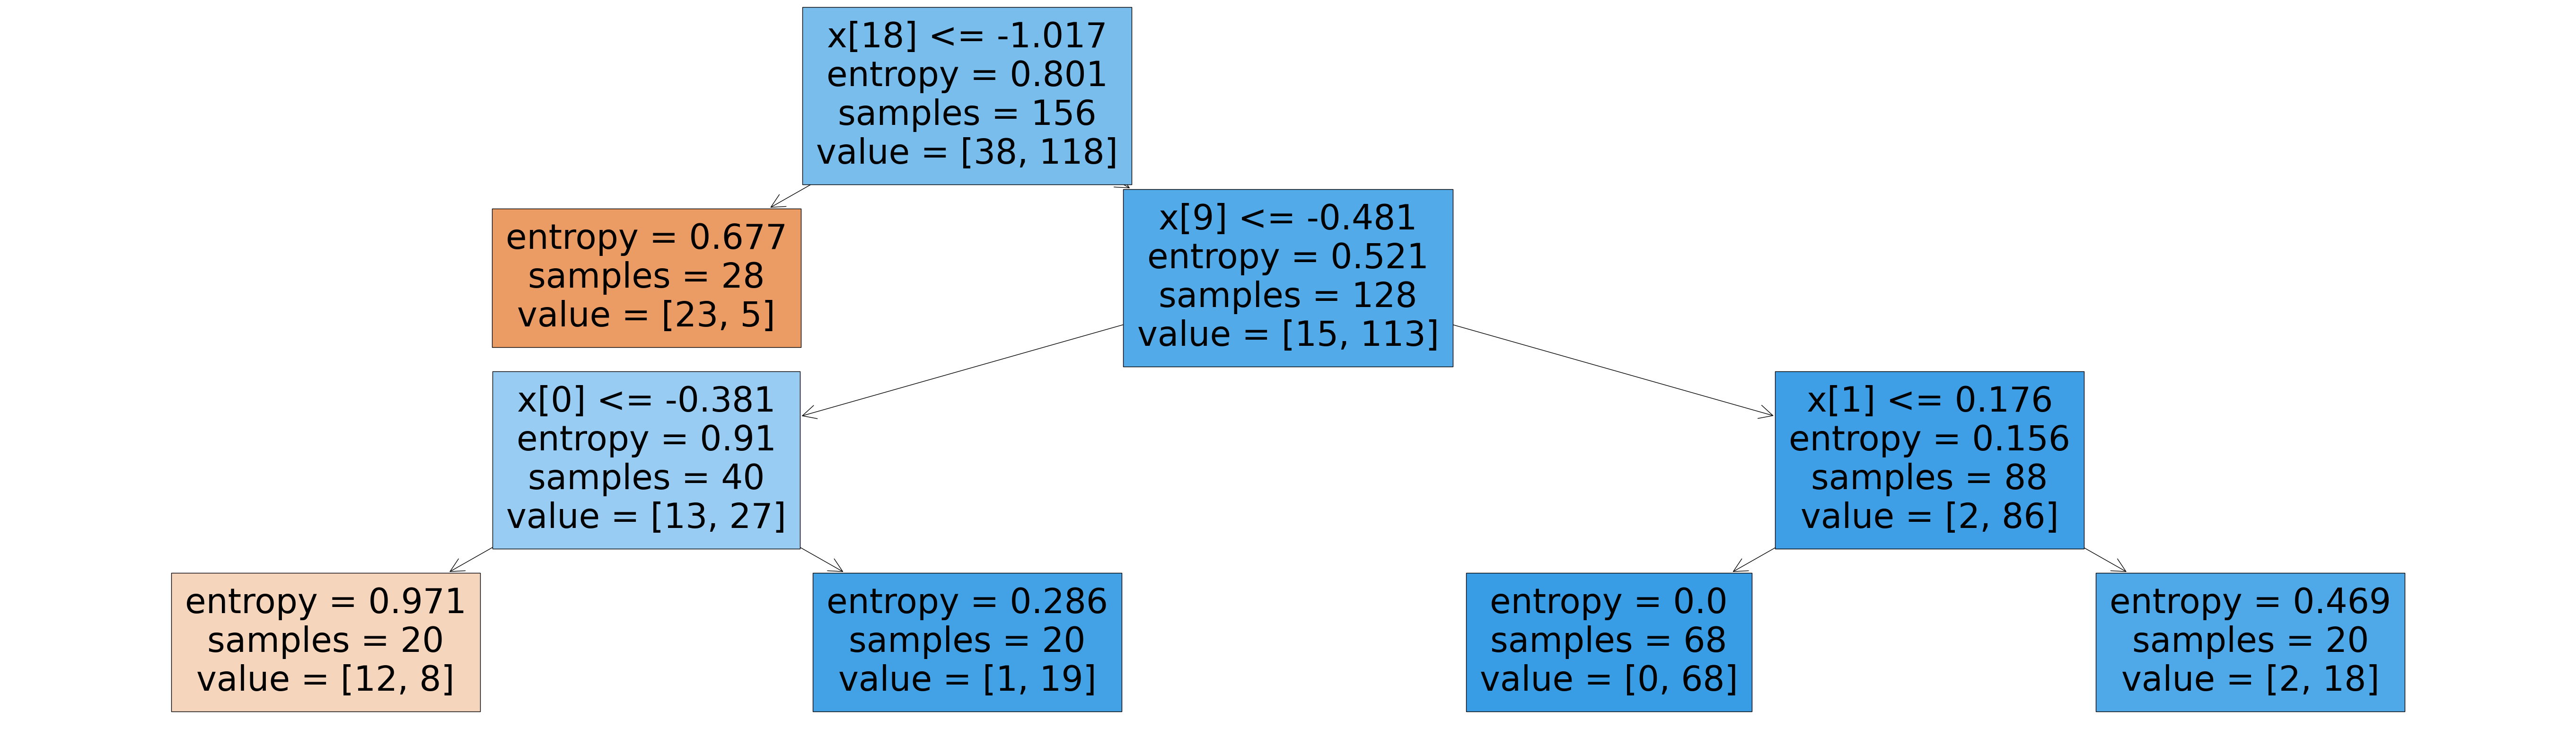

In [66]:
plt.figure(figsize=(70,20)) 
plot_tree(dtc, filled=True) 
plt.show()